In [9]:
import wave
import pydub

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [50]:
!pip install pyaudio

  Using cached https://files.pythonhosted.org/packages/ab/42/b4f04721c5c5bfc196ce156b3c768998ef8c0ae3654ed29ea5020c749a6b/PyAudio-0.2.11.tar.gz
  Complete output from command /Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -u -c "import setuptools, tokenize;__file__='/private/var/folders/fm/q3hrpc352zl26gbx0hm02cnm0000gn/T/pip-install-ws784qb_/pyaudio/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/fm/q3hrpc352zl26gbx0hm02cnm0000gn/T/pip-wheel-uw9rx8ur --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.6-intel-3.6
  copying src/pyaudio.py -> build/lib.macosx-10.6-intel-3.6
  running build_ext
  building '_portaudio' extension
  creating build/temp.macosx-10.6-intel-3.6
  creating build/temp.macosx-10.6-intel-3.6/src
  /usr/bin/clang -fno-strict-aliasing -Wsign-compare -fno-

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
s = wave.open("1;Petukhov V;25;M;.wav", "rb")

In [17]:
type(s)

wave.Wave_read

In [18]:
(nchannels, sampwidth, framerate, nframes, comptype, compname) = s.getparams()
content = s.readframes(nframes)

In [46]:
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32,
    8: np.int64,
}
samples = np.fromstring(content, dtype = types[sampwidth])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


In [20]:
for n in range(nchannels):
    channel = samples[n::nchannels]
duration = nframes / framerate 
w, h = 20000, 300
DPI = 72
peak = 256 ** sampwidth / 2
k = nframes/w/32

In [27]:
len(samples)

1054720

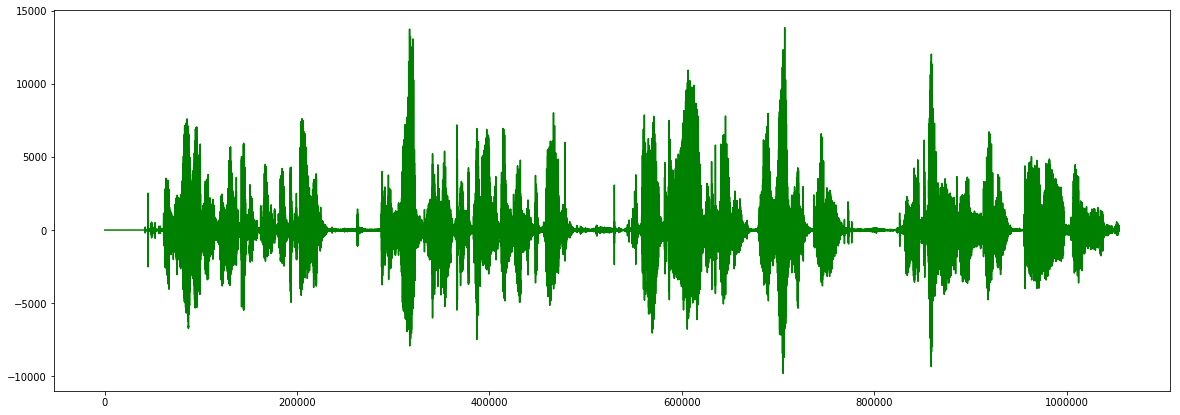

In [47]:
plt.figure(1, figsize=(20,7), dpi=DPI)
plt.plot(samples, "g")
plt.show()

In [41]:
amplitude = 300; 
freq_Hz = 500; 
data = []
n = 2000
for i in range(n):
    data.append(int(amplitude*100000000000* np.sin((2*np.pi*i*freq_Hz))/256)+123)
test = wave.open("test.wav","w")

test.setnframes(n)
test.setnchannels(1)
test.setsampwidth(4)
test.setframerate(1)

#for i in range(len(data)):
#    data[i] = bytes(data[i])

In [42]:
data = bytearray(data)

In [43]:
test.writeframes(data)

### Librosa trial

In [51]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 449kB/s ta 0:00:011
    100% |████████████████████████████████| 286kB 870kB/s ta 0:00:01
    100% |████████████████████████████████| 327kB 266kB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 507kB/s ta 0:00:01
    100% |████████████████████████████████| 13.2MB 733kB/s ta 0:00:01
  Stored in directory: /Users/uliakaliberda/Library/Caches/pip/wheels/ce/49/68/87ba660f30e3977f0778e39ee2e944629cd37c2a0ce41f9ff1
  Stored in directory: /Users/uliakaliberda/Library/Caches/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Stored in directory: /Users/uliakaliberda/Library/Caches/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


In [54]:
import librosa

# 1. Get the file path to the included audio example
filename = librosa.util.example_audio_file()

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load('1;Petukhov V;25;M;.wav')
print(y)

[ 0.          0.          0.         ... -0.00032147 -0.00060075
 -0.00088485]


In [55]:
len(y)

242256

In [56]:
print(sr)

22050


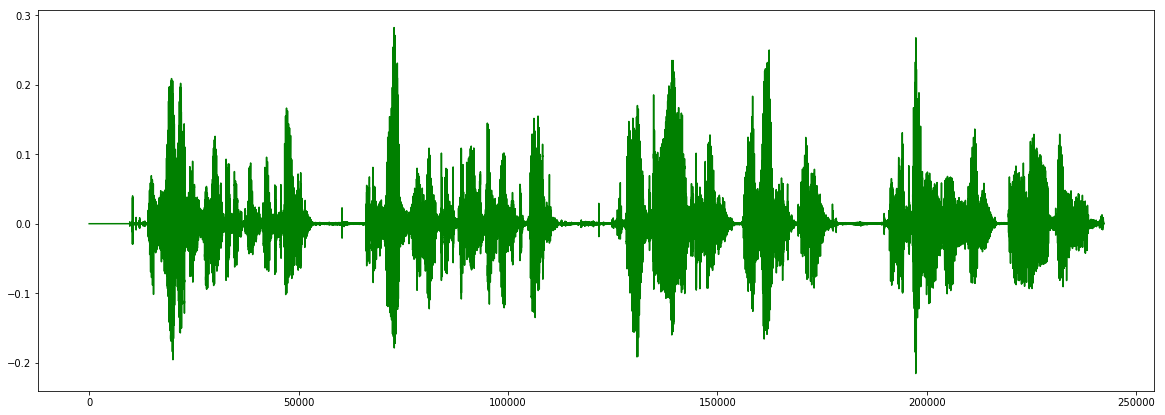

In [57]:
plt.figure(1, figsize=(20,7), dpi=DPI)
plt.plot(y, "g")
plt.show()

In [64]:
resampling_file = []
l = len(y)//40
for i in range(1,40):
    resampling_file.append(y[(i-1)*l:i*l])
print(len(resampling_file))

39


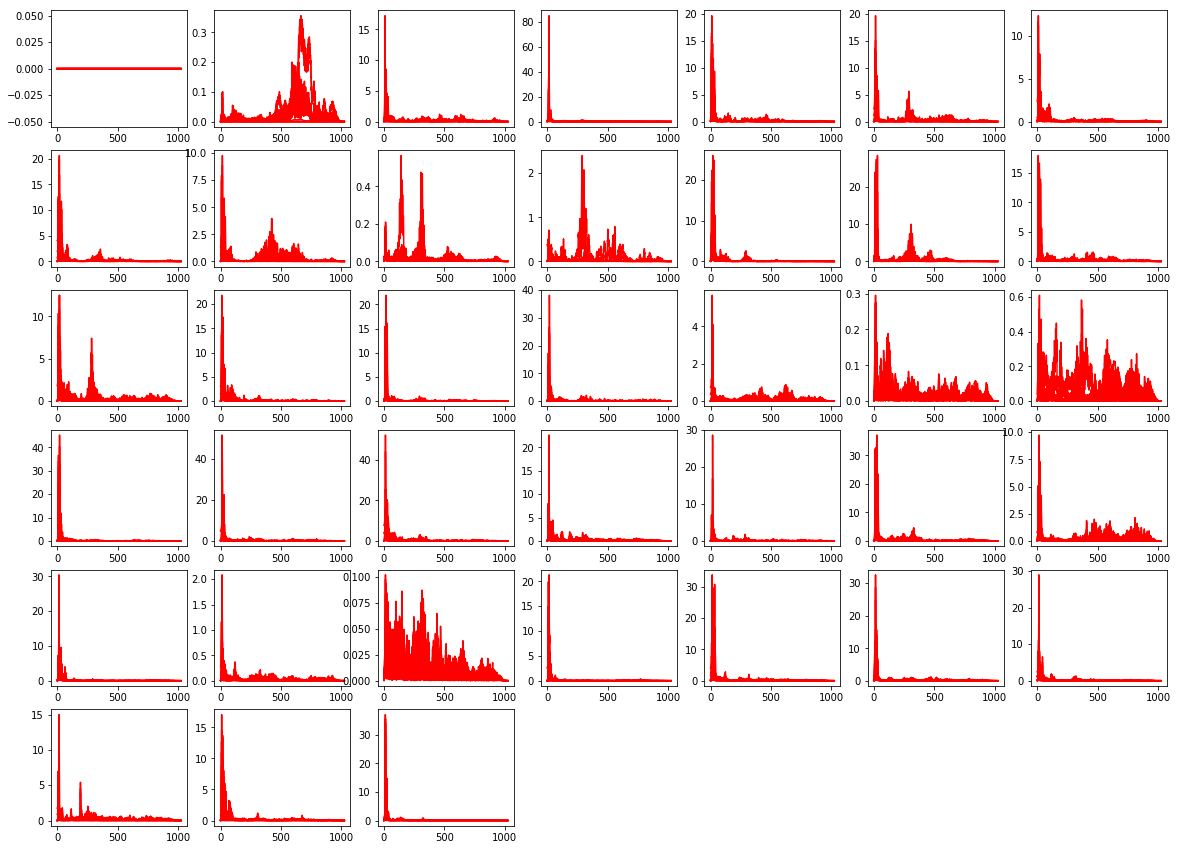

In [68]:
plt.figure(1, figsize=(20,15), dpi=DPI)
D = []
for i in range(len(resampling_file)-1):
    d = np.abs(librosa.stft(resampling_file[i]))
    plt.subplot(6, 7, i+1)
    plt.plot(d, "r")
    D.append(d)
plt.show()

In [69]:
for i in D:
    print(i.shape)

(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)
(1025, 12)


In [62]:
D.shape

(1025, 474)

In [ ]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

print('Saving output to beat_times.csv')
librosa.output.times_csv('beat_times.csv', beat_times)